# **Make Pretrained-Model FaceNet !**


## 0.미션


### (1) 미션1
여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 사전 학습 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 만들어야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - Keras에는 **실제로 존재하는 이미지 데이터를 처리**해주는 함수가 있습니다.

### (2) 미션2
데이터셋을 **학습에 적합한 형태**로 만들었다면, **FaceNet 모델로 Transfer Learning**을 수행합니다.

- 1) FaceNet 모델 구조를 생성합니다.
    - [FaceNet 논문 링크](https://arxiv.org/abs/1503.03832)
    - FaceNet의 Input은 (160, 160) 사이즈의 이미지입니다.
- 2) FaceNet 모델 구조 + 구조 추가
    - FaceNet의 Output은 128차원의 벡터입니다.
    - 이 과정을 Transfer Learning라고 합니다.

### (3) 미션3
학습된 모델로 추론하여 성능 지표를 확인하고 모델을 개선시키세요.

그 후, 모델의 구조와 가중치를 **반드시 저장**하여 여러분의 노트북에 옮기세요.

- 1) 다양한 모델을 사용해보세요.
    - 모델에 정해진 정답은 없습니다.
    - 성능 지표에서 무엇이 중요한지 깊게 생각하세요.
    - 사전 학습된 FaceNet 모델을 사용하셔도 좋고, 아예 독창적으로 여러분만의 모델을 만드셔도 좋습니다!
- 2) 모델을 **반드시 저장**하세요.
    - .keras 형태로 우선 Colab에 저장하세요.
    - Colab에 생성된 .keras 파일을 **로컬에 다운로드** 합니다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/project4'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [3]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install keras-nightly

## 3.미션1

여러분은 노트북에서 얼굴 인식 파일을 실행시키기 위해 사전 학습 모델을 만들어야 합니다.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 만들어야 합니다.

- 1) 데이터셋을 불러옵니다.
    - 데이터셋은 2가지입니다. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리합니다.
    - Keras에는 **실제로 존재하는 이미지 데이터를 처리**해주는 함수가 있습니다.

### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러옵니다.
        - 데이터셋은 두 개의 압축 파일이어야 합니다.
            1. lfw-deepfunneled.zip : Labeled Faces in the Wild 데이터셋
            2. 여러분의 얼굴 이미지 데이터셋
                - 여러분의 얼굴 이미지가 담긴 **압축 파일**을 **Google Drive에 업로드** 하기를 권장합니다.
                    - 이미지 파일 하나하나 업로드 하면 시간이 오래 걸립니다.
    - 데이터셋 압축 파일을 **Colab에 폴더를 생성한 후 해제**하세요.
        - 데이터셋 폴더를 **본인 얼굴 폴더, LFW 폴더로 나누어** 생성하는 것을 권장합니다.
        - 만일 두 압축 파일을 하나의 폴더에 모두 해제하면 전처리가 더 까다로워질 것입니다.
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

In [4]:
import os
import zipfile

In [5]:
data_myFace = os.path.join(path, '/content/drive/MyDrive/project4/myface_exam.zip')
data_myFace

'/content/drive/MyDrive/project4/myface_exam.zip'

#### 1) 본인 얼굴 이미지 데이터셋 불러오기

In [6]:
## Colab에 생성할 본인 얼굴 폴더 경로
extract_folder = '/content/my_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_myFace, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [7]:
len(os.listdir(extract_folder) )

5999

#### 2) 다른 얼굴 이미지 데이터셋 불러오기

In [8]:
data_other = '/content/drive/MyDrive/project4/Datasets/Keras/lfw-deepfunneled.zip'
data_other

'/content/drive/MyDrive/project4/Datasets/Keras/lfw-deepfunneled.zip'

In [9]:
## Colab에 생성할 다른 얼굴 폴더 경로
extract_folder = '/content/other_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_other, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [10]:
len(os.listdir(extract_folder) )

13233

### (2) 데이터셋 전처리
* **세부 요구사항**
    - 데이터셋을 전처리 합니다.
        - Training set, Validation set, Test set으로 데이터셋을 나누어 주세요.
            - 학습 과정에서 Training set, Validation set을 사용해야 합니다.
            - 추론 과정에서 Test set을 사용해야 합니다.
        - Keras의 **특정 함수**가 실제 존재하는 이미지 파일에 대한 전처리를 쉽게 도와줍니다.
        - **특정 함수**에서 요구하는 폴더 구조가 있습니다. **특정 함수**를 사용한다면 이에 맞춰서 폴더를 생성해야 합니다.
        - 각 데이터셋에 스케일링도 적용하세요.
    - 예시 코드에서 사용한 라이브러리
        - glob, random, shutil, numpy, keras

In [11]:
import glob
import random
import shutil
import numpy as np

from keras.utils import load_img, img_to_array
from keras.utils import image_dataset_from_directory

#### 1) 데이터셋 분할

In [12]:
## image_dataset_from_directory를 사용하기 위해 Colab에 폴더 생성

## 생성될 폴더의 경로
tr_data = '/content/tr_data'
te_data = '/content/te_data'

## 폴더가 존재하지 않을 때 폴더를 생성
if not os.path.exists(tr_data) :
    os.makedirs(tr_data)

if not os.path.exists(te_data) :
    os.makedirs(te_data)

## 폴더 생성 확인
print(os.path.exists(tr_data) )
print(os.path.exists(te_data) )


True
True


In [13]:
## Keras의 image_dataset_from_directory를 사용하기 위해 Colab에 하위 폴더 생성

## 생성될 폴더에 대한 하위 폴더 생성
class_names = ['my', 'other']

for cn in class_names :
    temp = os.path.join(tr_data, cn)

    if not os.path.exists( temp ) :
        os.makedirs(temp)

    ## 폴더 생성 확인
    print(os.path.exists(temp))

for cn in class_names :
    temp = os.path.join(te_data, cn)

    if not os.path.exists( temp ) :
        os.makedirs(temp)

    ## 폴더 생성 확인
    print(os.path.exists(temp))

True
True
True
True


In [14]:
## 본인 얼굴 데이터가 있는 폴더 경로의 파일 전체를 정렬하여 리스트화
img_list_my = sorted(glob.glob('/content/my_face/*',))

## 다른 얼굴 데이터가 있는 폴더 경로의 파일 전체를 정렬하여 리스트화
img_list_other = sorted(glob.glob('/content/other_face/*'))

## 이미지 갯수 확인
len(img_list_my), len(img_list_other)

(5999, 13233)

In [15]:
## 얼굴 데이터를 Training set, Test set으로 분할하기 위한 사전 작업
## 분할 재현성을 위한 난수 고정
random.seed(2024)
random.shuffle(img_list_my)
random.shuffle(img_list_other)

img_list_my[:5], img_list_other[:5]

(['/content/my_face/hs_4339.jpg',
  '/content/my_face/hs_699.jpg',
  '/content/my_face/hs_1342.jpg',
  '/content/my_face/hs_262.jpg',
  '/content/my_face/hs_403.jpg'],
 ['/content/other_face/Rio_Ferdinand_0002.jpg',
  '/content/other_face/Renee_Zellweger_0009.jpg',
  '/content/other_face/Laura_Bush_0022.jpg',
  '/content/other_face/Michael_Jordan_0004.jpg',
  '/content/other_face/Mahmoud_Abbas_0007.jpg'])

In [16]:
import shutil
import os

# Test set의 비율 설정
test_size = 0.2

# 나의 얼굴 파일 리스트와 다른 얼굴 파일 리스트에 대한 반복문
for i_l in [img_list_my, img_list_other]:
    # 리스트의 길이 체크
    list_len = len(i_l) if len(i_l) <= 11000 else 11000  # 예시 파일 수 맞춤

    # 데이터 분할을 위한 인덱스 설정
    split_idx = int(list_len * (1 - test_size))

    # 인덱스를 이용해 상위 리스트를 Training set, Test set 2가지로 세분화
    list_tr = i_l[:split_idx]
    list_te = i_l[split_idx:list_len]

    # 현재 리스트가 나의 얼굴 파일 리스트와 같다면
    if i_l == img_list_my:
        # "나의 얼굴 파일 리스트" 파일을 Training set으로 복사
        for file_path in list_tr:
            f_name = os.path.basename(file_path)
            shutil.copy(src=file_path, dst=os.path.join(tr_data, 'my', f_name))
            print(f'파일 이동 완료 (Training set): {f_name}')

        # "나의 얼굴 파일 리스트" 파일을 Test set으로 복사
        for file_path in list_te:
            f_name = os.path.basename(file_path)
            shutil.copy(src=file_path, dst=os.path.join(te_data, 'my', f_name))
            print(f'파일 이동 완료 (Test set): {f_name}')

    # 현재 리스트가 "다른 사람 얼굴 파일 리스트"라면
    else:
        # "다른 사람 얼굴 파일 리스트" 파일을 Training set으로 복사
        for file_path in list_tr:
            f_name = os.path.basename(file_path)
            shutil.copy(src=file_path, dst=os.path.join(tr_data, 'other', f_name))
            print(f'파일 이동 완료 (Training set): {f_name}')

        # "다른 사람 얼굴 파일 리스트" 파일을 Test set으로 복사
        for file_path in list_te:
            f_name = os.path.basename(file_path)
            shutil.copy(src=file_path, dst=os.path.join(te_data, 'other', f_name))
            print(f'파일 이동 완료 (Test set): {f_name}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
파일 이동 완료 (Training set): Khalid_Khannouchi_0001.jpg
파일 이동 완료 (Training set): Andrew_Sabey_0001.jpg
파일 이동 완료 (Training set): Ciro_Gomes_0003.jpg
파일 이동 완료 (Training set): Wilson_Alvarez_0001.jpg
파일 이동 완료 (Training set): Tim_Henman_0009.jpg
파일 이동 완료 (Training set): Taufik_Kiemas_0001.jpg
파일 이동 완료 (Training set): Tim_Welsh_0001.jpg
파일 이동 완료 (Training set): Janet_Thorpe_0002.jpg
파일 이동 완료 (Training set): Yoshiyuki_Kamei_0001.jpg
파일 이동 완료 (Training set): Donald_Hays_0001.jpg
파일 이동 완료 (Training set): George_HW_Bush_0002.jpg
파일 이동 완료 (Training set): Thomas_Wyman_0001.jpg
파일 이동 완료 (Training set): Celia_Cruz_0001.jpg
파일 이동 완료 (Training set): Junichiro_Koizumi_0047.jpg
파일 이동 완료 (Training set): John_Paul_II_0006.jpg
파일 이동 완료 (Training set): Mike_Webster_0001.jpg
파일 이동 완료 (Training set): Andy_Roddick_0007.jpg
파일 이동 완료 (Training set): Tom_Cruise_0004.jpg
파일 이동 완료 (Training set): Candie_Kung_0003.jpg
파일 이동 완료 (Training set): Meryl_Streep_0011.jpg
파일 이동 완료 (Training 

In [17]:
## "본인 얼굴"에 대한 파일 리스트의 상위 5개 조회
img_list_my[:5]

['/content/my_face/hs_4339.jpg',
 '/content/my_face/hs_699.jpg',
 '/content/my_face/hs_1342.jpg',
 '/content/my_face/hs_262.jpg',
 '/content/my_face/hs_403.jpg']

In [18]:
## 위의 5개 파일이 image_dataset_from_directory에 맞춰 생성한 경로에 알맞게 있는지 확인
## "본인 얼굴"에 대한 파일 리스트를 정렬한 후, 8:2로 나누었기 때문에 위의 상위 5개는 반드시 Training set의 "나의 얼굴" 폴더 안에 있어야 한다.

print(os.path.exists('/content/tr_data/my/hs_4339.jpg') )
print(os.path.exists('/content/tr_data/my/hs_699.jpg') )
print(os.path.exists('/content/tr_data/my/hs_1342.jpg') )
print(os.path.exists('/content/tr_data/my/hs_262.jpg') )
print(os.path.exists('/content/tr_data/my/hs_403.jpg') )

True
True
True
True
True


In [19]:
print('Training data의 my_face 이미지 수 : ', len(os.listdir('/content/tr_data/my')))
print('Training data의 other_face 이미지 수 : ', len(os.listdir('/content/tr_data/other')))

print('Test data의 my_face 이미지 수 : ', len(os.listdir('/content/te_data/my')))
print('Test data의 other_face 이미지 수 : ', len(os.listdir('/content/te_data/other')))

Training data의 my_face 이미지 수 :  4799
Training data의 other_face 이미지 수 :  8800
Test data의 my_face 이미지 수 :  1200
Test data의 other_face 이미지 수 :  2200


#### 2) **특정 함수** 사용

In [20]:
## Training set 데이터 폴더를 데이터셋화
## 이 과정에서 Validation set도 생성
tr_idfd, val_idfd = image_dataset_from_directory(tr_data,                    ## Training 폴더 경로
                                                 class_names=['other','my'], ## 클래스 순서 지정
                                                 batch_size=32,              ## 이미지 덩어리 단위
                                                 image_size=(160,160),       ## 이미지 리사이즈
                                                 shuffle=True,               ## 섞어야 올바르게 분할됨
                                                 seed=2024,                  ## 재현성
                                                 validation_split=0.3,       ## 데이터 스플릿 비율
                                                 subset='both',              ## 데이터셋 나눔 방식
                                                 )

Found 13599 files belonging to 2 classes.
Using 9520 files for training.
Using 4079 files for validation.


In [21]:
## Test set 데이터 폴더를 데이터셋화
te_idfd = image_dataset_from_directory(te_data,                    ## Test 폴더 경로
                                       class_names=['other','my'], ## 클래스 순서 지정
                                       batch_size=32,              ## 이미지 덩어리 단위
                                       image_size=(160,160),       ## 이미지 리사이즈
                                       shuffle=True,               ## 섞어야 올바르게 분할됨
                                       seed=2024                   ## 재현성
                                       )

Found 3400 files belonging to 2 classes.


In [22]:
## 위에서 만든 이미지 데이터 덩어리가 몇 개인지 확인
len(tr_idfd), len(val_idfd)

(298, 128)

#### 3) 스케일링

In [23]:
def rescale(image, label) :
    image = image / 255
    return image, label

In [24]:
tr_idfd_rescale = tr_idfd.map(rescale)
val_idfd_rescale = val_idfd.map(rescale)
te_idfd_rescale = te_idfd.map(rescale)

## 4.미션2

데이터셋을 **학습에 적합한 형태**로 만들었다면, **FaceNet 모델로 Transfer Learning**을 수행합니다.

- 1) FaceNet 모델 구조를 생성합니다.
    - [FaceNet 논문 링크](https://arxiv.org/abs/1503.03832)
    - FaceNet의 Input은 (160, 160) 사이즈의 이미지입니다.
- 2) FaceNet 모델 구조 + 구조 추가
    - FaceNet의 Output은 128차원의 벡터입니다.
    - 이 과정을 Transfer Learning라고 합니다.

### (1) FaceNet 구조 생성

* **세부 요구사항**
    - FaceNet의 구조를 생성합니다.
        - FaceNet 구조 생성에 필요한 함수를 만듭니다.
    - FaceNet의 구조에 **잘 학습된 가중치**를 부여합니다.
        - FaceNet 원본 가중치 파일을 공유하였습니다.
    - (선택사항) FaceNet 모델의 가중치 업데이트를 방지합니다.
    - 예시 코드에서 사용한 라이브러리
        - numpy, functools, keras

#### 1) 모델 구조 생성

In [25]:
import numpy as np
from functools import partial


import keras
from keras.models import Model

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D
from keras.layers import Lambda, Concatenate, add

from keras import backend as K
from keras.saving import register_keras_serializable

In [26]:
@register_keras_serializable()
def scaling(x, scale):
    return x * scale

@register_keras_serializable()
def conv2d_bn(x,
              filters,
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):
    x = Conv2D(filters,
               kernel_size,
               strides=strides,
               padding=padding,
               use_bias=use_bias,
               name=name)(x)
    if not use_bias:
        bn_axis = 1 if K.image_data_format() == 'channels_first' else 3
        bn_name = _generate_layer_name('BatchNorm', prefix=name)
        x = BatchNormalization(axis=bn_axis, momentum=0.995, epsilon=0.001,
                               scale=False, name=bn_name)(x)
    if activation is not None:
        ac_name = _generate_layer_name('Activation', prefix=name)
        x = Activation(activation, name=ac_name)(x)
    return x

@register_keras_serializable()
def _generate_layer_name(name, branch_idx=None, prefix=None):
    if prefix is None:
        return None
    if branch_idx is None:
        return '_'.join((prefix, name))
    return '_'.join((prefix, 'Branch', str(branch_idx), name))

@register_keras_serializable()
def _inception_resnet_block(x, scale, block_type, block_idx, activation='relu'):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    if block_idx is None:
        prefix = None
    else:
        prefix = '_'.join((block_type, str(block_idx)))
    name_fmt = partial(_generate_layer_name, prefix=prefix)

    if block_type == 'Block35':
        branch_0 = conv2d_bn(x, 32, 1, name=name_fmt('Conv2d_1x1', 0))
        branch_1 = conv2d_bn(x, 32, 1, name=name_fmt('Conv2d_0a_1x1', 1))
        branch_1 = conv2d_bn(branch_1, 32, 3, name=name_fmt('Conv2d_0b_3x3', 1))
        branch_2 = conv2d_bn(x, 32, 1, name=name_fmt('Conv2d_0a_1x1', 2))
        branch_2 = conv2d_bn(branch_2, 32, 3, name=name_fmt('Conv2d_0b_3x3', 2))
        branch_2 = conv2d_bn(branch_2, 32, 3, name=name_fmt('Conv2d_0c_3x3', 2))
        branches = [branch_0, branch_1, branch_2]
    elif block_type == 'Block17':
        branch_0 = conv2d_bn(x, 128, 1, name=name_fmt('Conv2d_1x1', 0))
        branch_1 = conv2d_bn(x, 128, 1, name=name_fmt('Conv2d_0a_1x1', 1))
        branch_1 = conv2d_bn(branch_1, 128, [1, 7], name=name_fmt('Conv2d_0b_1x7', 1))
        branch_1 = conv2d_bn(branch_1, 128, [7, 1], name=name_fmt('Conv2d_0c_7x1', 1))
        branches = [branch_0, branch_1]
    elif block_type == 'Block8':
        branch_0 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_1x1', 0))
        branch_1 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_0a_1x1', 1))
        branch_1 = conv2d_bn(branch_1, 192, [1, 3], name=name_fmt('Conv2d_0b_1x3', 1))
        branch_1 = conv2d_bn(branch_1, 192, [3, 1], name=name_fmt('Conv2d_0c_3x1', 1))
        branches = [branch_0, branch_1]
    else:
        raise ValueError('Unknown Inception-ResNet block type. '
                         'Expects "Block35", "Block17" or "Block8", '
                         'but got: ' + str(block_type))

    mixed = Concatenate(axis=channel_axis, name=name_fmt('Concatenate'))(branches)
    up = conv2d_bn(mixed,
                #    K.int_shape(x)[channel_axis],
                   x.shape[channel_axis],
                   1,
                   activation=None,
                   use_bias=True,
                   name=name_fmt('Conv2d_1x1'))
    up = Lambda(scaling,
                # output_shape=K.int_shape(up)[1:],
                output_shape=up.shape[1:],
                arguments={'scale': scale})(up)
    x = add([x, up])
    if activation is not None:
        x = Activation(activation, name=name_fmt('Activation'))(x)
    return x

In [27]:
@register_keras_serializable()
def InceptionResNetV1(input_shape=(160, 160, 3),
                      classes=128,
                      dropout_keep_prob=0.8,
                      weights_path=None):
    inputs = Input(shape=input_shape)
    x = conv2d_bn(inputs, 32, 3, strides=2, padding='valid', name='Conv2d_1a_3x3')
    x = conv2d_bn(x, 32, 3, padding='valid', name='Conv2d_2a_3x3')
    x = conv2d_bn(x, 64, 3, name='Conv2d_2b_3x3')
    x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
    x = conv2d_bn(x, 80, 1, padding='valid', name='Conv2d_3b_1x1')
    x = conv2d_bn(x, 192, 3, padding='valid', name='Conv2d_4a_3x3')
    x = conv2d_bn(x, 256, 3, strides=2, padding='valid', name='Conv2d_4b_3x3')

    # 5x Block35 (Inception-ResNet-A block):
    for block_idx in range(1, 6):
        x = _inception_resnet_block(x,
                                    scale=0.17,
                                    block_type='Block35',
                                    block_idx=block_idx)

    # Mixed 6a (Reduction-A block):
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    name_fmt = partial(_generate_layer_name, prefix='Mixed_6a')
    branch_0 = conv2d_bn(x,
                         384,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 0))
    branch_1 = conv2d_bn(x, 192, 1, name=name_fmt('Conv2d_0a_1x1', 1))
    branch_1 = conv2d_bn(branch_1, 192, 3, name=name_fmt('Conv2d_0b_3x3', 1))
    branch_1 = conv2d_bn(branch_1,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 1))
    branch_pool = MaxPooling2D(3,
                               strides=2,
                               padding='valid',
                               name=name_fmt('MaxPool_1a_3x3', 2))(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='Mixed_6a')(branches)

    # 10x Block17 (Inception-ResNet-B block):
    for block_idx in range(1, 11):
        x = _inception_resnet_block(x,
                                    scale=0.1,
                                    block_type='Block17',
                                    block_idx=block_idx)

    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    name_fmt = partial(_generate_layer_name, prefix='Mixed_7a')
    branch_0 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 0))
    branch_0 = conv2d_bn(branch_0,
                         384,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 0))
    branch_1 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 1))
    branch_1 = conv2d_bn(branch_1,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 1))
    branch_2 = conv2d_bn(x, 256, 1, name=name_fmt('Conv2d_0a_1x1', 2))
    branch_2 = conv2d_bn(branch_2, 256, 3, name=name_fmt('Conv2d_0b_3x3', 2))
    branch_2 = conv2d_bn(branch_2,
                         256,
                         3,
                         strides=2,
                         padding='valid',
                         name=name_fmt('Conv2d_1a_3x3', 2))
    branch_pool = MaxPooling2D(3,
                               strides=2,
                               padding='valid',
                               name=name_fmt('MaxPool_1a_3x3', 3))(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='Mixed_7a')(branches)

    # 5x Block8 (Inception-ResNet-C block):
    for block_idx in range(1, 6):
        x = _inception_resnet_block(x,
                                    scale=0.2,
                                    block_type='Block8',
                                    block_idx=block_idx)
    x = _inception_resnet_block(x,
                                scale=1.,
                                activation=None,
                                block_type='Block8',
                                block_idx=6)

    # Classification block
    x = GlobalAveragePooling2D(name='AvgPool')(x)
    x = Dropout(1.0 - dropout_keep_prob, name='Dropout')(x)
    # Bottleneck
    x = Dense(classes, use_bias=False, name='Bottleneck')(x)
    bn_name = _generate_layer_name('BatchNorm', prefix='Bottleneck')
    x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False,
                           name=bn_name)(x)

    # Create model
    model = Model(inputs, x, name='inception_resnet_v1')
    if weights_path is not None:
        model.load_weights(weights_path)

    return model

In [28]:
 facenet_model = InceptionResNetV1()

In [29]:
## FaceNet 구조의 전체 레이어 길이
len(facenet_model.layers)

447

In [30]:
## FaceNet 전체 구조 확인
facenet_model.summary()

Model: "inception_resnet_v1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3 (Conv2D)    │ (None, 79, 79, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3_BatchNorm   │ (None, 79, 79, 32)     │             96 │ Conv2d_1a_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_1a_3x3_Activation  │ (None, 79, 79, 32)     │              0 │ Conv2d_1a_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3 (Conv2D)    │ (None, 77, 77, 32)     │          9,216 │ Conv2d_1a_3x3_Activat… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3_BatchNorm   │ (None, 77, 77, 32)     │             96 │ Conv2d_2a_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2a_3x3_Activation  │ (None, 77, 77, 32)     │              0 │ Conv2d_2a_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3 (Conv2D)    │ (None, 77, 77, 64)     │         18,432 │ Conv2d_2a_3x3_Activat… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3_BatchNorm   │ (None, 77, 77, 64)     │            192 │ Conv2d_2b_3x3[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_2b_3x3_Activation  │ (None, 77, 77, 64)     │              0 │ Conv2d_2b_3x3_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool_3a_3x3            │ (None, 38, 38, 64)     │              0 │ Conv2d_2b_3x3_Activat… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1 (Conv2D)    │ (None, 38, 38, 80)     │          5,120 │ MaxPool_3a_3x3[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1_BatchNorm   │ (None, 38, 38, 80)     │            240 │ Conv2d_3b_1x1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_3b_1x1_Activation  │ (None, 38, 38, 80)     │              0 │ Conv2d_3b_1x1_BatchNo… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2d_4a_3x3 (Conv2D)    │ (None, 36, 36, 192)    │        138,240 │ Conv2d_3b_1x1_Activat… │
├──────────────────────

 Total params: 22,808,144 (87.01 MB)

 Trainable params: 22,779,312 (86.90 MB)

 Non-trainable params: 28,832 (112.62 KB)

#### 2) 모델에 가중치 적용

In [31]:
## FaceNet 가중치 파일 경로 설정
weights_path = '/content/drive/MyDrive/project4/Datasets/Keras/facenet_model_weights.npz'
weights_path

'/content/drive/MyDrive/project4/Datasets/Keras/facenet_model_weights.npz'

In [32]:
## 가중치 파일 불러오기
loaded_weights = np.load(weights_path)

loaded_weights

NpzFile '/content/drive/MyDrive/project4/Datasets/Keras/facenet_model_weights.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...

In [33]:
## FaceNet 각 레이어에 가중치 적용
facenet_model.set_weights([loaded_weights[key] for key in loaded_weights])

#### 3) 모델의 가중치 업데이트 방지 (선택사항)

In [34]:
## FaceNet 전체 레이어 확인
facenet_model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=Conv2d_1a_3x3, built=True>,
 <BatchNormalization name=Conv2d_1a_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_1a_3x3_Activation, built=True>,
 <Conv2D name=Conv2d_2a_3x3, built=True>,
 <BatchNormalization name=Conv2d_2a_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_2a_3x3_Activation, built=True>,
 <Conv2D name=Conv2d_2b_3x3, built=True>,
 <BatchNormalization name=Conv2d_2b_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_2b_3x3_Activation, built=True>,
 <MaxPooling2D name=MaxPool_3a_3x3, built=True>,
 <Conv2D name=Conv2d_3b_1x1, built=True>,
 <BatchNormalization name=Conv2d_3b_1x1_BatchNorm, built=True>,
 <Activation name=Conv2d_3b_1x1_Activation, built=True>,
 <Conv2D name=Conv2d_4a_3x3, built=True>,
 <BatchNormalization name=Conv2d_4a_3x3_BatchNorm, built=True>,
 <Activation name=Conv2d_4a_3x3_Activation, built=True>,
 <Conv2D name=Conv2d_4b_3x3, built=True>,
 <BatchNormalization name=Conv2d_4b_3x3_BatchNorm,

In [35]:
## FaceNet 전체 레이어 가중치 업데이트 방지
for l in facenet_model.layers :
    l.trainable = False

### (2) 모델 구조 변형

* **세부 요구사항**
    - 우리의 문제에 맞게 모델을 변형해야 합니다.
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 추가 모델링

In [36]:
## FaceNet 모델에 이진 분류용 레이어 하나 추가
K.clear_session()

custom_model = keras.models.Sequential()

custom_model.add(facenet_model)
custom_model.add(Dense(1, activation='sigmoid') )

In [37]:
custom_model.summary() ## keras-nightly로는 정상 작동

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_resnet_v1 (Functional)     │ (None, 128)                 │      22,808,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,808,273 (87.01 MB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 22,808,144 (87.01 MB)

In [38]:
custom_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'precision', 'recall']
                     )

## 5.미션3

학습된 모델로 추론하여 성능 지표를 확인하고 모델을 개선시키세요.

그 후, 모델의 구조와 가중치를 **반드시 저장**하여 여러분의 노트북에 옮기세요.

- 1) 다양한 모델을 사용해보세요.
    - 모델에 정해진 정답은 없습니다.
    - 성능 지표에서 무엇이 중요한지 깊게 생각하세요.
    - 사전 학습된 FaceNet 모델을 사용하셔도 좋고, 아예 독창적으로 여러분만의 모델을 만드셔도 좋습니다!
- 2) 모델을 **반드시 저장**하세요.
    - .keras 형태로 우선 Colab에 저장하세요.
    - Colab에 생성된 .keras 파일을 **로컬에 다운로드** 합니다.

### (1) 모델 학습

* **세부 요구사항**
    - 모델 구조를 잘 변형하였다면, 학습도 진행해야 합니다.
        - Keras에서 지원하는 다양한 함수를 사용하세요.
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 학습에 유용한 함수 불러오기

In [39]:
from keras.callbacks import EarlyStopping

#### 2) 모델 학습

In [40]:
es = EarlyStopping(patience=4, verbose=1, restore_best_weights=True)

In [41]:
## 모델 학습
history = custom_model.fit(tr_idfd, validation_data=val_idfd,
                 epochs=100, verbose=1,
                 class_weight={0:1, 1:2}, ## 클래스 1에 대해 가중치를 더 주려는 의도
                 callbacks=[es]
                 ).history

Epoch 1/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 64s 149ms/step - accuracy: 0.6193 - loss: 0.9754 - precision: 0.4891 - recall: 0.6794 - val_accuracy: 0.9147 - val_loss: 0.2712 - val_precision: 0.8542 - val_recall: 0.9076
Epoch 2/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.8713 - loss: 0.4164 - precision: 0.7724 - recall: 0.9088 - val_accuracy: 0.9429 - val_loss: 0.1921 - val_precision: 0.8903 - val_recall: 0.9517
Epoch 3/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - accuracy: 0.9111 - loss: 0.3113 - precision: 0.8325 - recall: 0.9407 - val_accuracy: 0.9539 - val_loss: 0.1595 - val_precision: 0.9044 - val_recall: 0.9687
Epoch 4/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.9261 - loss: 0.2674 - precision: 0.8559 - recall: 0.9522 - val_accuracy: 0.9591 - val_loss: 0.1388 - val_precision: 0.9155 - val_recall: 0.9709
Epoch 5/100
298/298 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.9306 - loss: 0.2431 - precision: 0.8674 - recall: 0.9517 - val_accuracy: 0.963

In [43]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

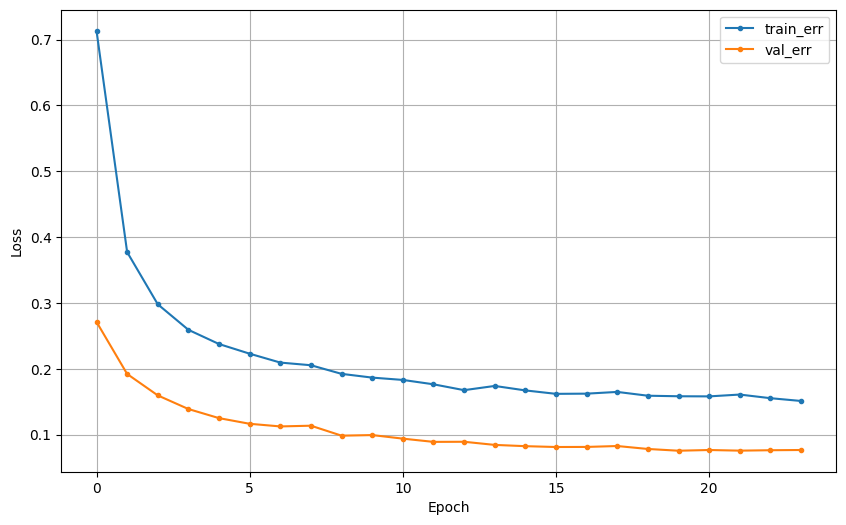

In [44]:
dl_history_plot(history)

### (2) 모델 추론

* **세부 요구사항**
    - 학습된 모델의 성능을 확인해보세요.
        - 임계값 조절, 클래스 가중치 부여 등으로 모델의 성능을 높여보세요.
    - 예시 코드에서 사용한 라이브러리
        - keras, sklearn

#### 1) 모델 추론

In [45]:
## image_dataset_from_directory로 만든 Test set로 예측값 생성
y_pred = custom_model.predict(te_idfd)
y_pred

107/107 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step


array([[9.8434836e-01],
       [9.5683163e-01],
       [9.2240405e-01],
       ...,
       [1.0272802e-04],
       [3.2366206e-08],
       [1.1730195e-05]], dtype=float32)

In [46]:
## 예측값에 대한 임계값을 0.5로 설정하여 0과 1로 구분
y_pred_fix = np.where(y_pred>=0.5, 1, 0)
y_pred_fix = y_pred_fix.flatten()
y_pred_fix

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
len(y_pred_fix.nonzero()[0])

1216

#### 2) 성능 확인

In [58]:
from sklearn.metrics import *

In [49]:
## 성능 확인을 위하여 Test set의 Y만 떼와 array로 저장
temp = []

for te_x, te_y in te_idfd :
    temp.append(te_y.numpy())

y_true = np.concatenate(temp)

In [50]:
len(y_true.nonzero()[0])

1200

In [59]:
print(accuracy_score(y_true, y_pred_fix))
print(classification_report(y_true, y_pred_fix, target_names=['other', 'my']) )

0.5511764705882353
              precision    recall  f1-score   support

       other       0.65      0.65      0.65      2200
          my       0.37      0.37      0.37      1200

    accuracy                           0.55      3400
   macro avg       0.51      0.51      0.51      3400
weighted avg       0.55      0.55      0.55      3400



### (3) 모델 저장

* **세부 요구사항**
    - **반드시 반드시 모델을 저장하고 로컬에 다운로드하세요.**
    - 예시 코드에서 사용한 라이브러리
        - keras

#### 1) 모델 저장

In [ ]:
## .keras로 저장해야 안전
custom_model.save('facenet.keras')

#### 2) 저장된 모델 체크

In [ ]:
## Colab에 저장된 모델을 불러와 확인
# temp_model = keras.saving.load_model('')
# temp_model.summary()